In [1]:
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.shape

(144, 2)

In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
df.set_index('Month', inplace=True)

In [9]:
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [10]:
df.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [11]:
df.isnull().sum()

Passengers    0
dtype: int64

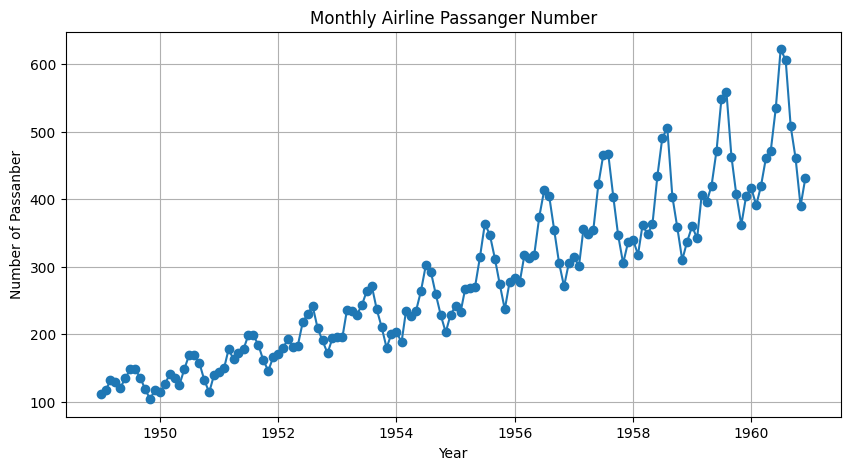

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df, marker='o')
plt.title('Monthly Airline Passanger Number')
plt.xlabel("Year")
plt.ylabel("Number of Passanber")
plt.grid(True)
plt.show()

In [13]:
df.shape

(144, 1)

In [14]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## Monthly time series trend

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

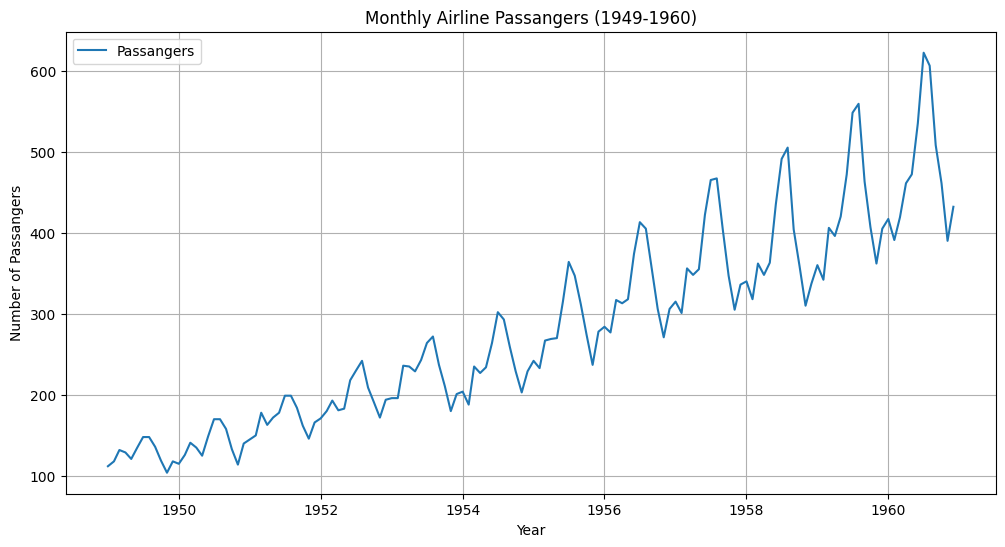

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Passangers')
plt.title('Monthly Airline Passangers (1949-1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passangers')
plt.grid(True) 
plt.legend()
plt.show()

## plot rolling mean and standard deviation

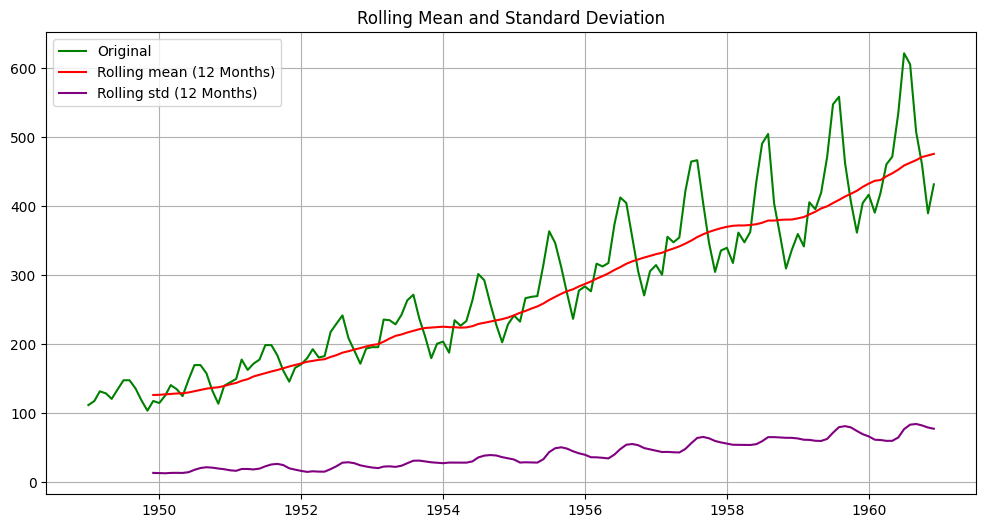

In [17]:
roll_mean = df['Passengers'].rolling(window=12).mean()
roll_std = df['Passengers'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Original', color='green')
plt.plot(roll_mean, label='Rolling mean (12 Months)', color='red')
plt.plot(roll_std, label='Rolling std (12 Months)', color='purple')
plt.title("Rolling Mean and Standard Deviation")
plt.grid(True) 
plt.legend()
plt.show()

## Perform ADF Test (Statistical Stationary)

In [18]:
result = adfuller(df['Passengers'])

In [19]:
# ADF Statistics
result[0]

np.float64(0.8153688792060441)

In [20]:
# P-value
result[1]

np.float64(0.9918802434376409)

In [21]:
for key, value in result[4].items():
    print(f"Critical Value {key}: {value}")

Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598


### Decompose the Series

In [22]:
decompose_result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

<Figure size 1200x1000 with 0 Axes>

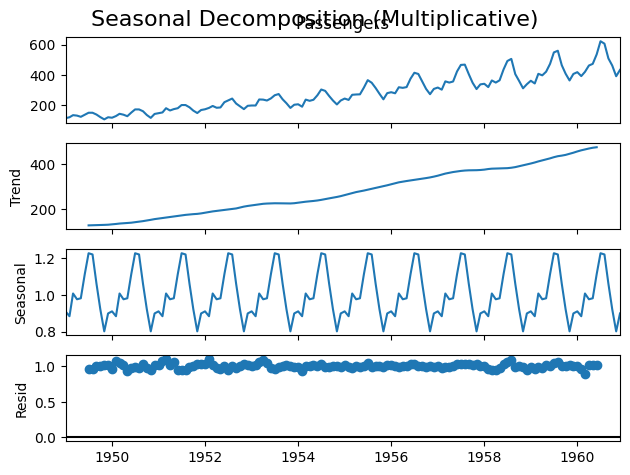

In [23]:
plt.figure(figsize=(12, 10))
decompose_result.plot()
plt.suptitle('Seasonal Decomposition (Multiplicative)', fontsize=16)
plt.show()

## First order Differencing

In [24]:
df_diff1 = df['Passengers'].diff().dropna()

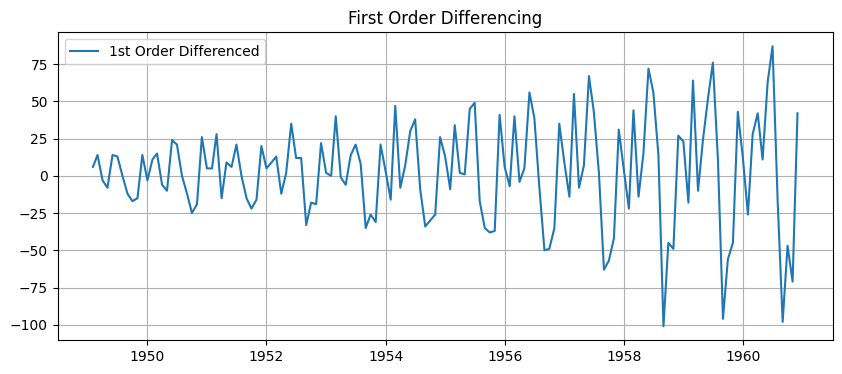

In [25]:
plt.figure(figsize=(10, 4))
plt.plot(df_diff1, label = "1st Order Differenced")
plt.title('First Order Differencing')
plt.grid(True) 
plt.legend()
plt.show()

In [26]:
result_diff1 = adfuller(df_diff1)

In [27]:
# ADF Statistics 
result_diff1[0]

np.float64(-2.8292668241699968)

In [28]:
# P-Value
result_diff1[1]

np.float64(0.05421329028382589)

In [29]:
for key, value in result_diff1[4].items():
    print(f"Critical Value {key}: {value}")

Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598


## First order Differencing

In [30]:
df_diff2 = df['Passengers'].diff().diff().dropna()

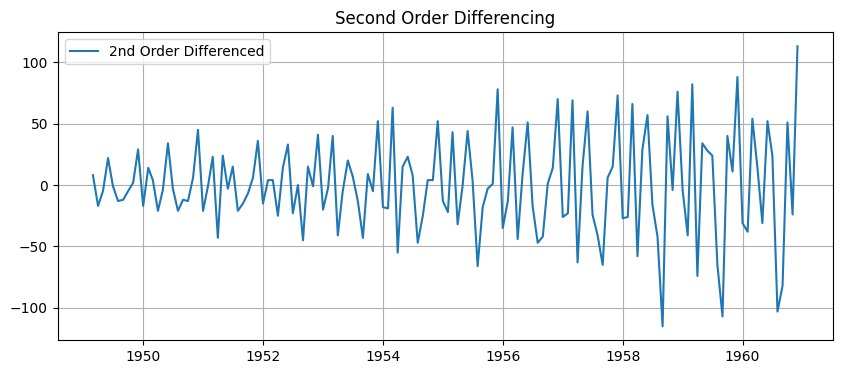

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(df_diff2, label = "2nd Order Differenced")
plt.title('Second Order Differencing')
plt.grid(True) 
plt.legend()
plt.show()

In [32]:
result_diff2 = adfuller(df_diff2)

In [33]:
# ADF Statistics 
result_diff2[0]

np.float64(-16.38423154246854)

In [34]:
# p-value 
result_diff2[1]

np.float64(2.7328918500140445e-29)

## Plot ACF and PACF

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

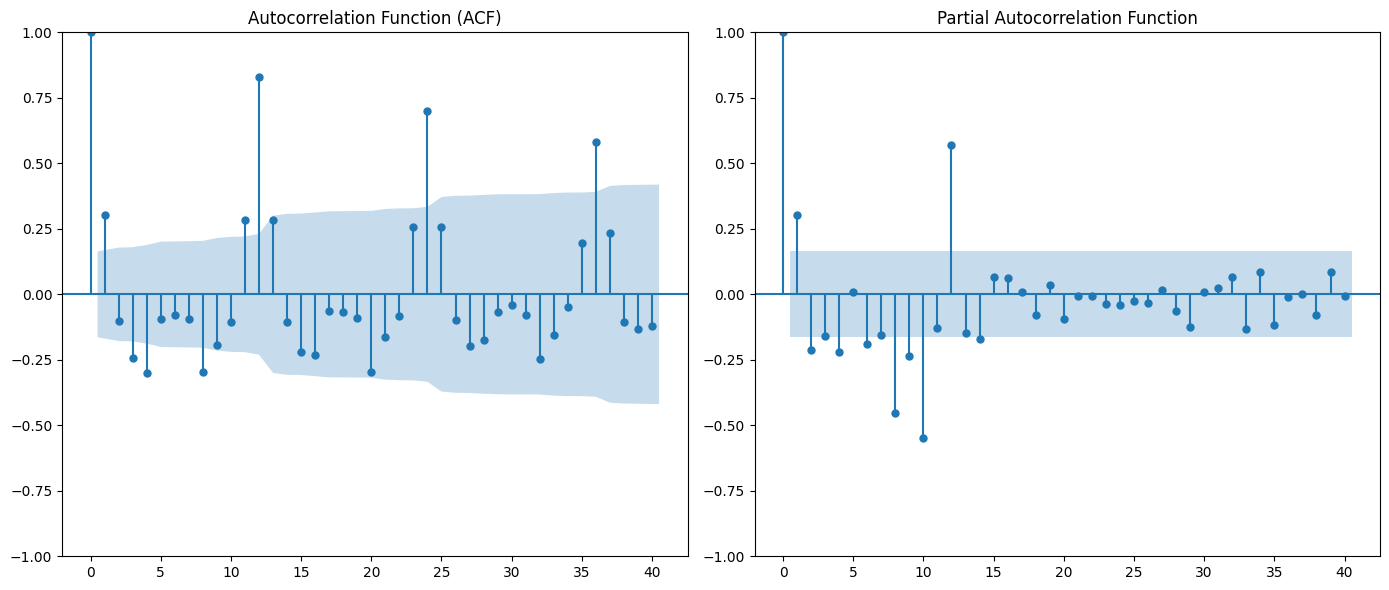

In [36]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(df_diff1, lags=40, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(df_diff1, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function')

plt.tight_layout() 
plt.show()

## Build AR model

In [37]:
from statsmodels.tsa.ar_model import AutoReg

In [38]:
model_ar = AutoReg(df_diff1, lags = 1, trend = 'c')
result_ar = model_ar.fit()

/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  143
Model:                     AutoReg(1)   Log Likelihood                -694.294
Method:               Conditional MLE   S.D. of innovations             32.151
Date:                Sat, 21 Jun 2025   AIC                           1394.588
Time:                        17:27:00   BIC                           1403.456
Sample:                    03-01-1949   HQIC                          1398.192
                         - 12-01-1960                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6125      2.703      0.597      0.551      -3.685       6.910
Passengers.L1     0.3059      0.080      3.808      0.000       0.148       0.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2695           +0.0000j            3.2695            0.0000
-----------------------------------------------------------------------------
"""

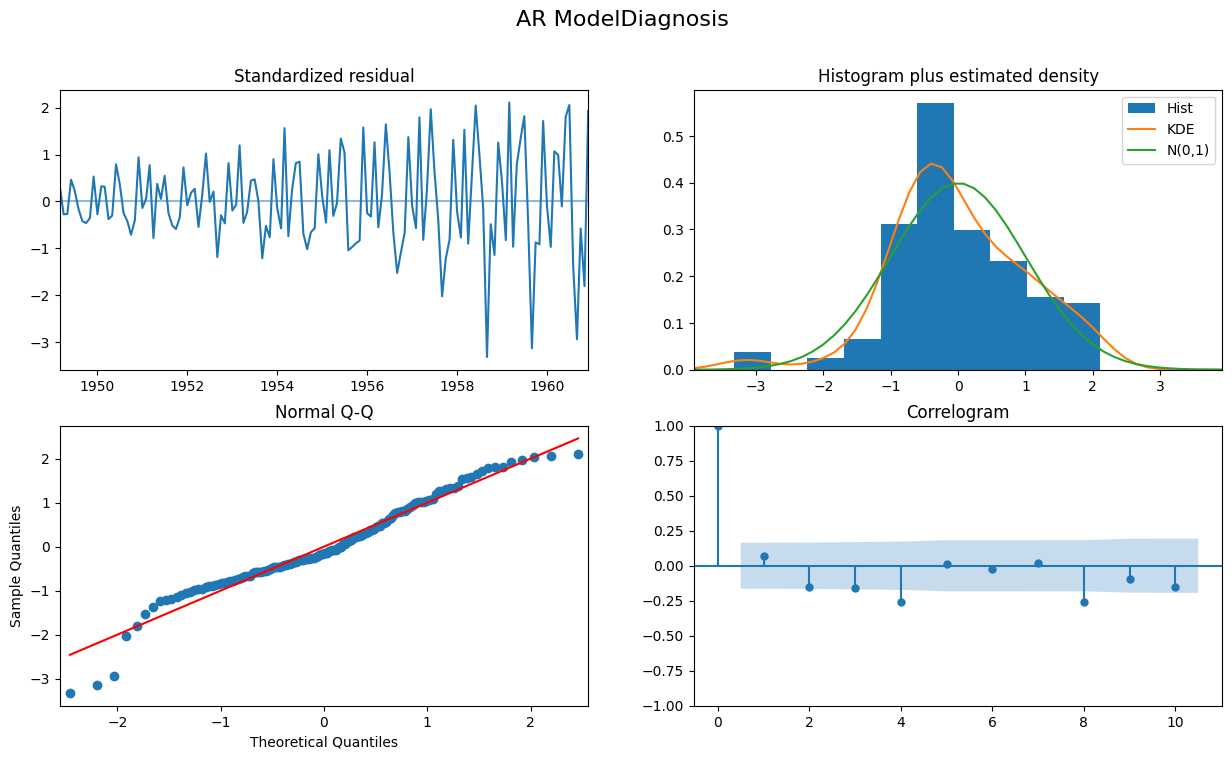

In [40]:
result_ar.plot_diagnostics(figsize=(15, 8))
plt.suptitle("AR ModelDiagnosis", fontsize=16)
plt.show()

## Build Arima Model

In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
model = ARIMA(df['Passengers'], order=(2, 1, 5), freq='MS')
model_fit = model.fit()

/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -670.235
Date:                Sat, 21 Jun 2025   AIC                           1356.469
Time:                        17:27:10   BIC                           1380.172
Sample:                    01-01-1949   HQIC                          1366.101
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9222      0.065     14.121      0.000       0.794       1.050
ar.L2         -0.7866      0.051    -15.415      0.000      -0.887      -0.687
ma.L1         -0.6935      0.183     -3.792      0.000      -1.052      -0.335
ma.L2          0.3665      0.561      0.653      0.514      -0.733       1.466
ma.L3          0.3921      0.136      2.888      0.004       0.126       0.658
ma.L4         -0.6669      0.370     -1.800      0.072      -1.393       0.059
ma.L5          0.0097      0.102      0.095      0.924      -0.190       0.209
sigma2       654.2408    372.350      1.757      0.079     -75.553    1384.034
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.58   Prob(JB):                         0.65
Heteroskedasticity (H):               6.11   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

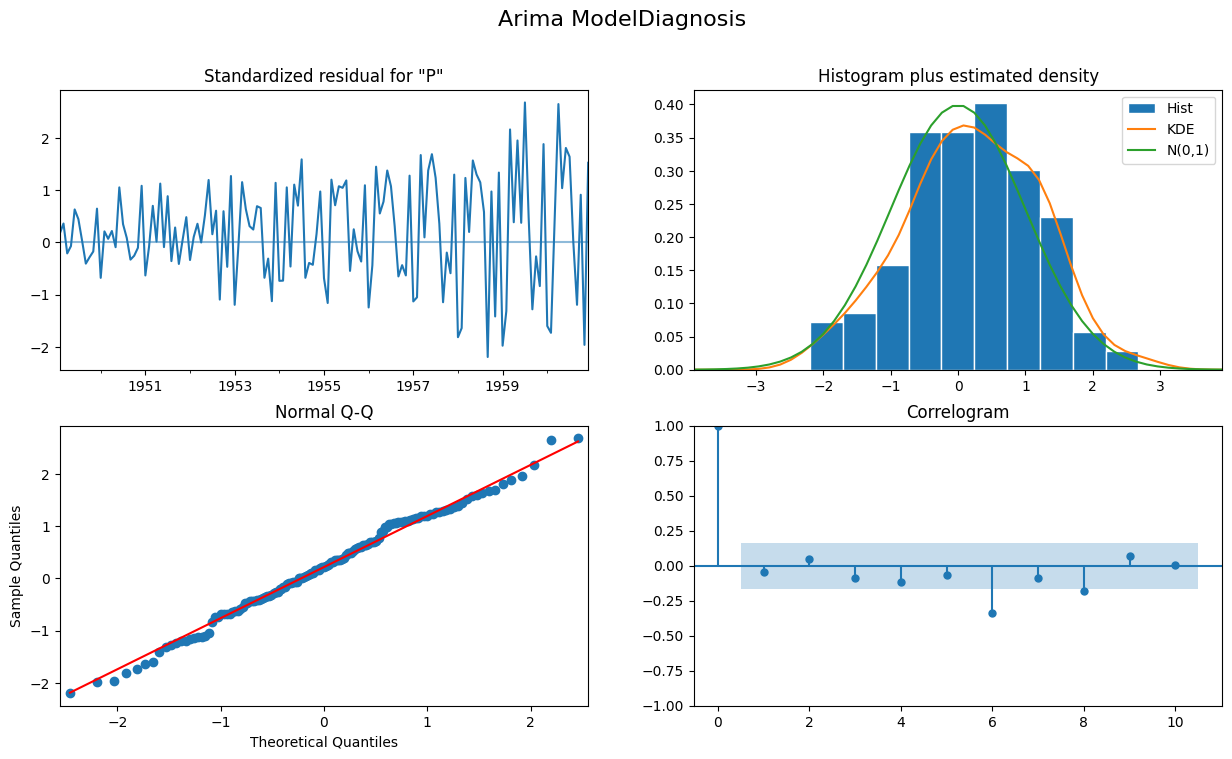

In [45]:
model_fit.plot_diagnostics(figsize=(15, 8))
plt.suptitle("Arima ModelDiagnosis", fontsize=16)
plt.show()

## Forecast for next 12 months

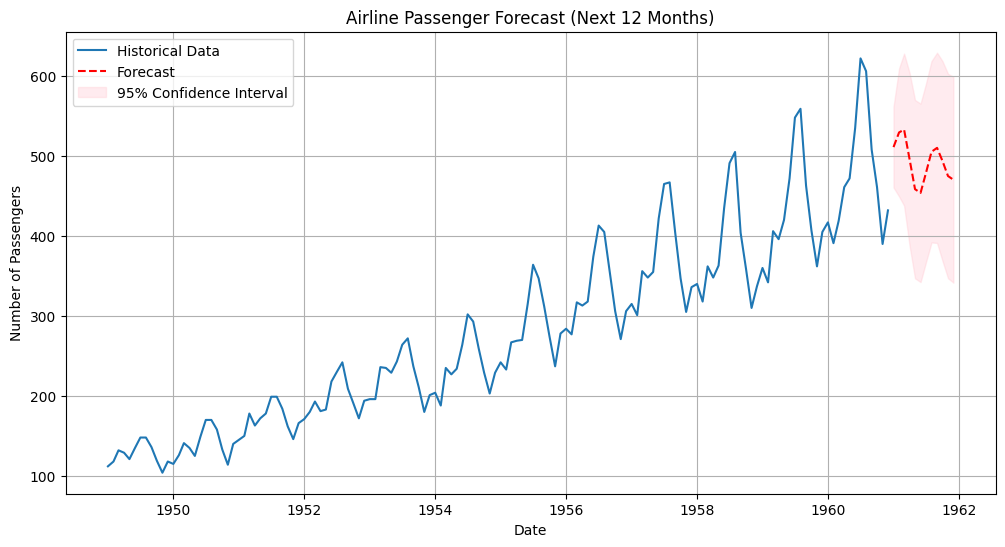

In [46]:
forecast_step = 12
forecast_result = model_fit.get_forecast(steps = forecast_step) 

forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

last_date = df.index[-1]
future_dates = pd.date_range(start = last_date + pd.DateOffset(months=1), periods=forecast_step, freq='MS')
forecast.index = future_dates
conf_int.index = future_dates

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Historical Data')
plt.plot(forecast, label='Forecast', color='red', linestyle='--')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Airline Passenger Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
size = int(len(df) - 30)
train, test = df['Passengers'][0:size], df['Passengers'][size:len(df)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 ARIMA MODEL : In- Sample Forecasting 



/tmp/ipykernel_7867/484157051.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 435.368729, expected = 491.000000
predicted = 487.825560, expected = 505.000000
predicted = 484.761914, expected = 404.000000
predicted = 359.074739, expected = 359.000000
predicted = 380.902398, expected = 310.000000
predicted = 291.230269, expected = 337.000000
predicted = 336.927667, expected = 360.000000
predicted = 367.621545, expected = 342.000000
predicted = 360.295275, expected = 406.000000
predicted = 414.083702, expected = 396.000000
predicted = 378.520878, expected = 420.000000
predicted = 424.477429, expected = 472.000000
predicted = 459.477027, expected = 548.000000
predicted = 534.243659, expected = 559.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 523.517264, expected = 463.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 417.606783, expected = 407.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 366.683180, expected = 362.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 339.217720, expected = 405.000000
predicted = 411.312453, expected = 417.000000
predicted = 435.938124, expected = 391.000000
predicted = 418.796168, expected = 419.000000
predicted = 451.314962, expected = 461.000000
predicted = 488.383964, expected = 472.000000
predicted = 488.569052, expected = 535.000000
predicted = 532.219018, expected = 622.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 601.145806, expected = 606.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 563.027108, expected = 508.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 452.853004, expected = 461.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 415.002720, expected = 390.000000
predicted = 367.672967, expected = 432.000000


/home/sabin/myenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


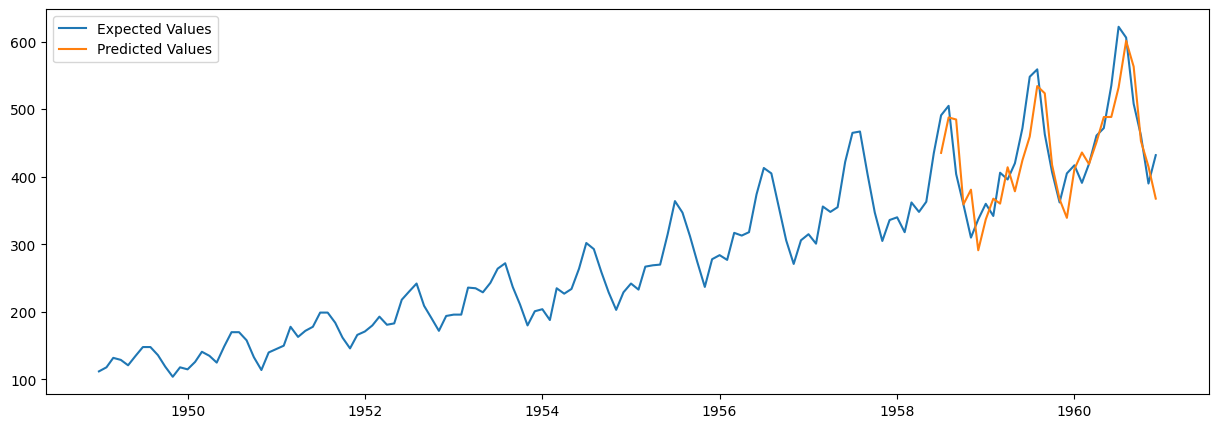

In [48]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df['Passengers'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
r2_score(test, predictions)

0.6562787463033588

In [51]:
np.sqrt(mean_squared_error(test, predictions))

np.float64(45.351507558955106)

### Save model

In [52]:
import pickle

with open('ARIMA_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## SARIMA

In [53]:
import statsmodels.api as sm

In [54]:
df_diff1_seas = df_diff1.diff(12)
df_diff1_seas = df_diff1_seas.dropna()

In [55]:
dec = sm.tsa.seasonal_decompose(df_diff1_seas, period=12)

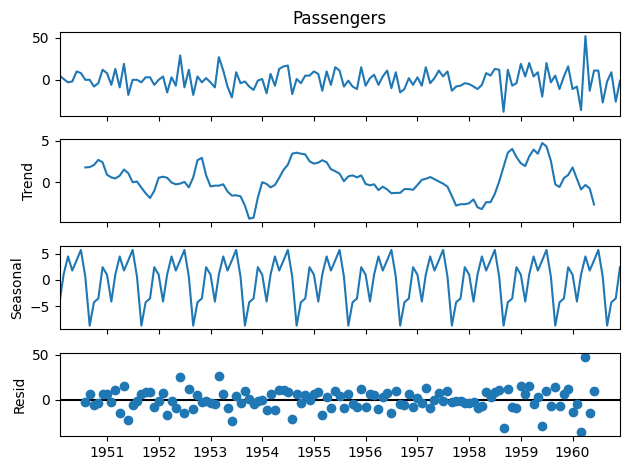

In [56]:
dec.plot()
plt.show()

In [57]:
size = int(len(df) - 30)
train, test = df['Passengers'][0:size], df['Passengers'][size:len(df)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history,order = (2,1,2),seasonal_order = (0,1,1,12))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 SARIMA MODEL : In - Sample Forecasting 



/tmp/ipykernel_7867/157828418.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 479.084602, expected = 491.000000
predicted = 490.553510, expected = 505.000000
predicted = 441.276123, expected = 404.000000
predicted = 357.274099, expected = 359.000000
predicted = 315.251651, expected = 310.000000
predicted = 347.831320, expected = 337.000000
predicted = 344.251380, expected = 360.000000
predicted = 336.839674, expected = 342.000000
predicted = 387.593236, expected = 406.000000
predicted = 387.333485, expected = 396.000000
predicted = 408.192789, expected = 420.000000
predicted = 485.988157, expected = 472.000000
predicted = 529.031344, expected = 548.000000
predicted = 551.914007, expected = 559.000000
predicted = 459.061271, expected = 463.000000
predicted = 411.970100, expected = 407.000000
predicted = 358.421154, expected = 362.000000
predicted = 384.945715, expected = 405.000000
predicted = 420.143838, expected = 417.000000
predicted = 397.755394, expected = 391.000000
predicted = 451.335509, expected = 419.000000
predicted = 415.677126, expected =

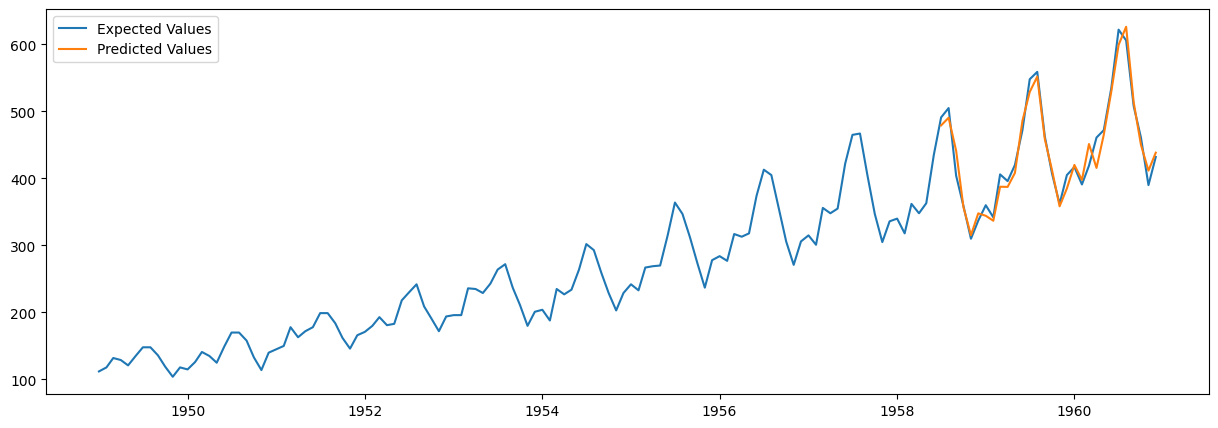

In [58]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df['Passengers'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [59]:
r2_score(test, predictions)

0.9521284453111291

In [60]:
np.sqrt(mean_squared_error(test, predictions))

np.float64(16.924946349908055)

### Save model

In [61]:
import pickle

with open('SARIMA_model.pkl', 'wb') as f:
    pickle.dump(model, f)